<a href="https://colab.research.google.com/github/Nokulunga77/Bank-Segmentation-/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Banking Customer Segmentation 

#### by Nokulunga Twala

## Table of contents
1. [Introduction](#intro)
2. [Load Dependencies](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
## 1. **Introduction**

Customer segmentation reveals specific intelligence for banks to understand customers on a deeper level. To deliver the services customers are expecting, segmenting customers by their level of digital sophistication and financial acumen can helps banks stay on a competitive edge. When applied in combination with other segmental analyses, these insights open up subtler and more sophisticated ways to approach customers as their shift to digital accelerates.

Common customer segmentation attributes can include

**Income generated by Customers** - The past, current and the predicted future of a customer’s purchase along with the revenue generated by the bank

**Demographics** – This information about the customer will include age, geography, gender, generation, income level and marital status

**Stages of Life** – Focused primarily on various milestones achieved by the customer during journey with the bank – for example – graduating college or retirement

**Attitude** – Customers’ opinions on the banking industry, online and mobile banking, and their satisfaction with the bank

**Behavior** – Interactions between customers and banks, the channels and the frequency of their usage, and which products they adopt


**Problem Statement**

Most of the banks are on the path of moving away from branch banking and towards becoming truly digital. Looking at the customer segments, one can formulate the strategy around the need to go completely digital on short term basis or this can be done in a staggered way. E.g. If the bank’s predominant customer base is high net worth individuals beyond 50s, the spend can be distributed between introducing new products and digital. However, if the bank's customer base is young, in that case it makes more sense in driving good amount of IT budget towards online, mobile apps driven banking. 

**Objective / Aim**

* The objective of this case study is to segment the customer banking data using unsupervised algorithm.

<a id="intro"></a>
## 2. **Load Dependencies**

### Libraries 

In [43]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import requests
import io

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# Data Preprocessing
import random
from time import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# for operating system
import os


#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

### Data

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Case Study/bank_transactions.csv')

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization.

In [46]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [47]:
df.CustLocation.value_counts()

MUMBAI                                 103595
NEW DELHI                               84928
BANGALORE                               81555
GURGAON                                 73818
DELHI                                   71019
NOIDA                                   32784
CHENNAI                                 30009
PUNE                                    25851
HYDERABAD                               23049
THANE                                   21505
KOLKATA                                 19974
GHAZIABAD                               15834
NAVI MUMBAI                             13080
AHMEDABAD                               12264
FARIDABAD                               11318
JAIPUR                                   9921
CHANDIGARH                               9526
LUCKNOW                                  7763
MOHALI                                   6741
SURAT                                    5770
NASHIK                                   4970
LUDHIANA                          

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


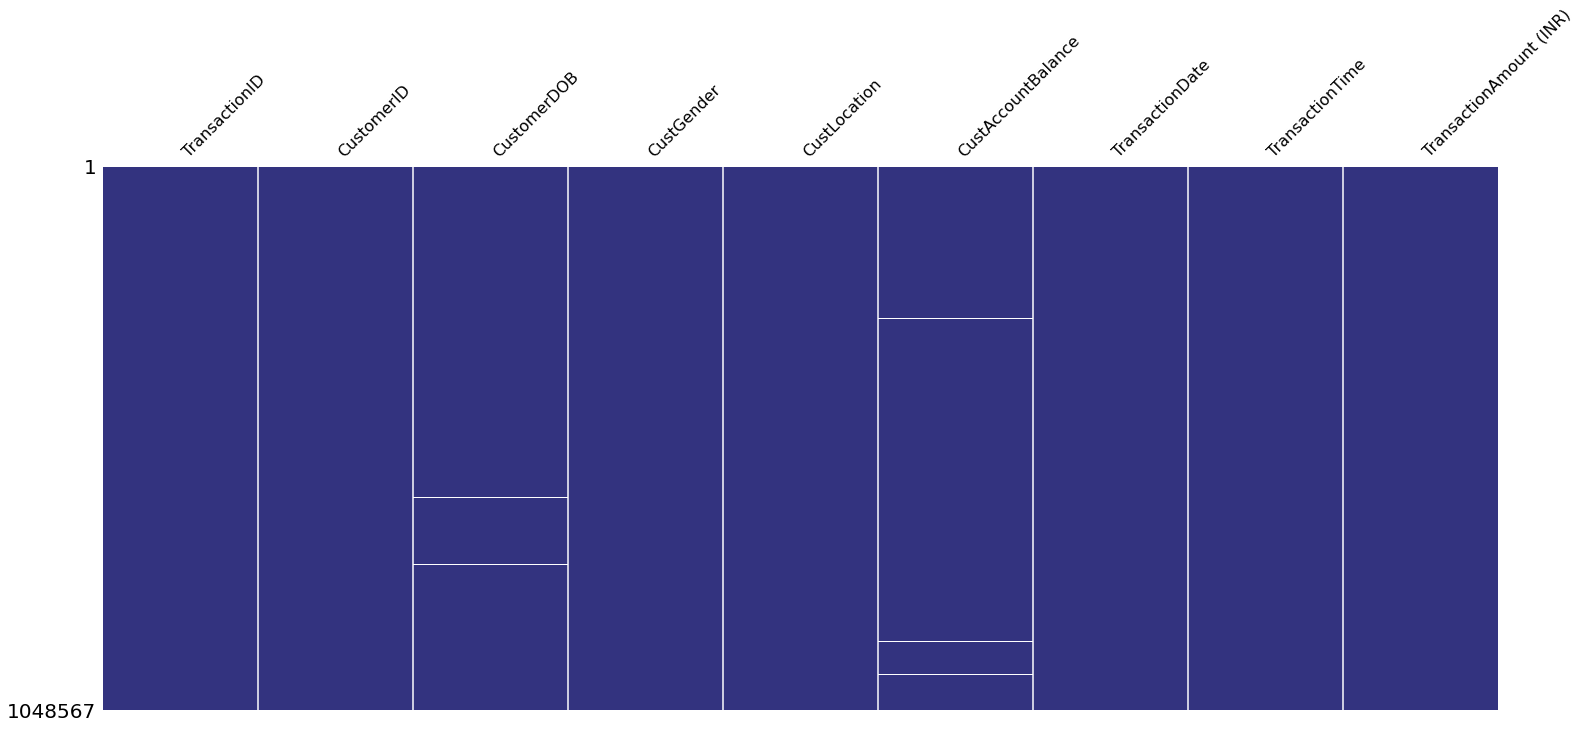

In [50]:
#distribution of the null values
import missingno as msno
msno.matrix(df,sparkline = False,color = (0.2, 0.2, 0.5))

In [49]:
(df.isnull().sum()/len(df))*100

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

The missing values are less than 1% therefore they will be dropped.

In [51]:
#To remove the nullvalues
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 1041614


In [52]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

The data consist of 'T' as one of the gender values. However for this exercise will be focusing on the M and F genders. There for the row with 'T' gender will be dropped. 

In [53]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

<a id="features"></a>

## 5. **Feature Engineering**

In order for us to be able to visualise our demographic information in relation to the customers bank transactions or account balance. We need to firstly need to extract the Age from the Customer Date of Birth column. 

In [54]:
#Age of customer today
df.CustomerDOB = pd.to_datetime(df.CustomerDOB, errors='coerce')

In [55]:
from datetime import date
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [56]:
df['Age'] = df.CustomerDOB.apply(age)

In [59]:
# Only show ages that are greater than 0
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)

KeyError: ignored

In [58]:
#Extracting year, month and day from Transaction column
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [60]:
df['TransactionYear'] = df.TransactionDate.dt.year
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [61]:
df.drop('TransactionDate',axis=1,inplace=True)

In [62]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionMonthName,TransactionDay,TransactionDayName
0,T1,C5841053,F,JAMSHEDPUR,17819.05,143207,25.0,27,2016,2,February,8,Monday
2,T3,C4417068,F,MUMBAI,17874.44,142712,459.0,25,2016,2,February,8,Monday
3,T4,C5342380,F,MUMBAI,866503.21,142714,2060.0,48,2016,2,February,8,Monday
4,T5,C9031234,F,NAVI MUMBAI,6714.43,181156,1762.5,34,2016,2,February,8,Monday
5,T6,C1536588,F,ITANAGAR,53609.20,173940,676.0,50,2016,2,February,8,Monday


In [63]:
df.shape

(966886, 13)

In [64]:
#Exporting cleaned dataframe for PowerBI
df.to_csv (r'C:\Users\Twala\Desktop\export_dataframe.csv', index = False, header=True)


<a id="intro"></a>
## 4. **Exploratory Data Analysis**

The EDA data analysis is used to get a better understanding of data and look for the data. For statisticians, it is similar to a kind of storytelling. It allows for the discovery of trends and observations within data using visual methods. Aside from that, EDA is frequently used as the first step in the data modeling process. It will explore the dataset as well as perform the exploratory data analysis.

In [ ]:
new_df = df.copy()

Text(0.5, 1.0, 'Distribution of Customer Gender')

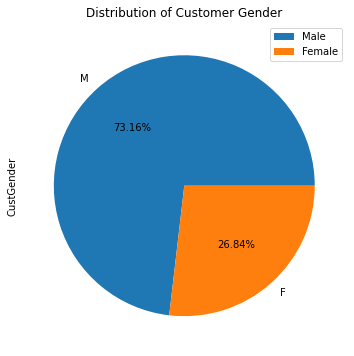

In [ ]:
new_df.CustGender.value_counts().plot(kind = "pie", figsize = (9,6), autopct='%1.2f%%')
plt.legend(['Male', 'Female']);
plt.title("Distribution of Customer Gender")

A large proportion of bank customers are Male at 73%, as shown above. 

Text(0.5, 1.0, 'Average Customer Account Balance by Gender')

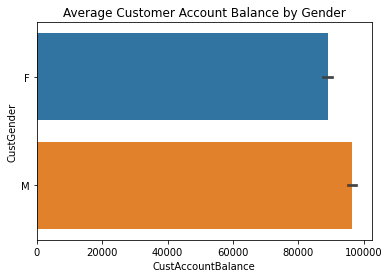

In [ ]:
sns.barplot(x ='CustAccountBalance' , y = 'CustGender', data = new_df)
plt.title("Average Customer Account Balance by Gender")

On average, Males bank customers have  marginally higher account balances than Female bank customers 

Text(0.5, 1.0, 'Average Transsction Amount by Gender')

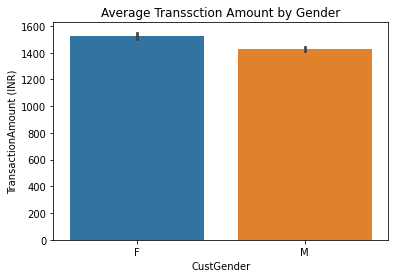

In [ ]:
sns.barplot(x = 'CustGender', y = 'TransactionAmount (INR)', data = new_df)
plt.title('Average Transaction Amount by Gender')

On average, Female bank customers have bit higher transcations than Male Bank customers. 

Text(0.5, 1.0, 'Monthly Comparison of Account Balances between Genders')

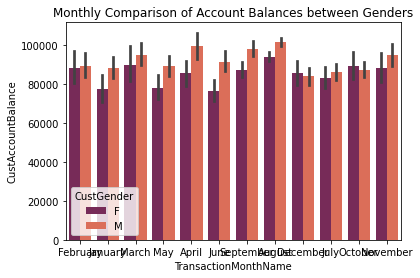

In [ ]:
sns.barplot(x = 'TransactionMonthName',y = 'CustAccountBalance', data = new_df ,hue='CustGender', palette = "rocket" )
plt.title('Monthly Comparison of Account Balances between Genders')

Females perform a great deal of transactions almost through out the year, except for the months of 

Text(0.5, 1.0, 'Monthly Comparison of Spending Habits between Genders')

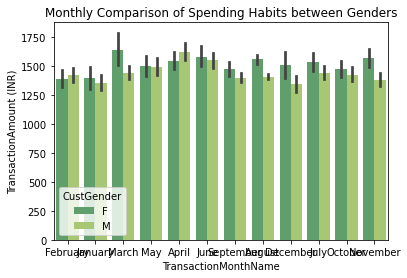

In [ ]:
sns.barplot(x = 'TransactionMonthName',y = 'TransactionAmount (INR)', data = new_df ,hue='CustGender', palette ='summer')
plt.title('Monthly Comparison of Spending Habits between Genders')

In [ ]:
#plt.figure(figsize=(15,8),dpi=200)
sns.barplot(x ='CustAccountBalance', y = 'Age' ,data = new_df, palette = 'hls')
plt.title('Account Balances per Age')

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(x ='TransactionAmount (INR)', y = 'Age' ,data = new_df, palette = 'hls')
plt.title('Transaction Amount per Age')

In [ ]:
sns.barplot(x = 'CustAccountBalance', y = 'CustLocation' , data = new_df, order = new_df.sort_values('CustAccountBalance', ascending=False), palette = 'summer')
plt.title('Customer Account Balances per Location')